# **Forecasting**

The idea is to use the same time series used for the univaraite Section.
In fact, we will use the time series of the attribute CO(GT) and we analyse the last week of october 2004.
We will use the series without noise, but, Some transformations have also been made in order to identify the best series in terms of stationarity.
The transformation that we have take into considerations respect to the orginial one (withouot noise) are:
- Logaritmic Tranformation
- ?? differentiated transformation (trasformazione differenziata sarebbe)

we will analyse the stationartiy of the time series with this data and with the Dickey-Fuller test.
 

PRESO DA UN SITO PER CAPIRE MEGLIO DF TEST:

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

The more negative is the Test statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

In [462]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

Ora carico il dataset normale:

In [463]:
dataframe = pd.read_csv('dataTS.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [464]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [465]:
dataframe.dtypes

DateTime         object
CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekend           int64
dtype: object

ora vado a convertire DateTime in formato data e poi la metto come indice:

In [466]:
dataframe['DateTime']=pd.to_datetime(dataframe.DateTime)

In [467]:
dataframe.dtypes

DateTime        datetime64[ns]
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekend                  int64
dtype: object

In [468]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [469]:
dataframe.shape

(744, 8)

Ora che abbiamo DateTime nel formato giusto settiamolo come Indice:

In [470]:
dataframe = dataframe.set_index(['DateTime'])


In [471]:
dataframe.head()

,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
DateTime,,,,,,,
2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


## Create Dataset 4 Forecasting

as explained in the Univariate section we are going to analyze only the CO(GT) variable taking into account the last week of October to avoid anomalies (vedere anche discorso iniziale di qeusto notebook)


In [472]:
dfForecasting = dataframe[['CO(GT)']]
dfForecasting.head()

,CO(GT)
DateTime,
2004-10-01 00:00:00,1.9
2004-10-01 01:00:00,1.6
2004-10-01 02:00:00,1.3
2004-10-01 03:00:00,0.8
2004-10-01 04:00:00,0.6


In [473]:
dfForecasting.tail()

,CO(GT)
DateTime,
2004-10-31 19:00:00,4.7
2004-10-31 20:00:00,4.1
2004-10-31 21:00:00,4.1
2004-10-31 22:00:00,2.7
2004-10-31 23:00:00,2.6


In [474]:
dfForecasting.shape

(744, 1)

Queelo che segue non è acnora Forecasting, ma lo metono in questa sezione anche concettualmente, quindi ora farò confronto tra le serie temporli tra varie trasfomraizoni e poi finire con Forecasting vero e proprio:

## "Forecasting" su Time series CO(GT) senza rumore

Riprendo codice fatto anche per univariata, non so se serve ma almeno metto tutto anche qua senza cercare tra due notebook:

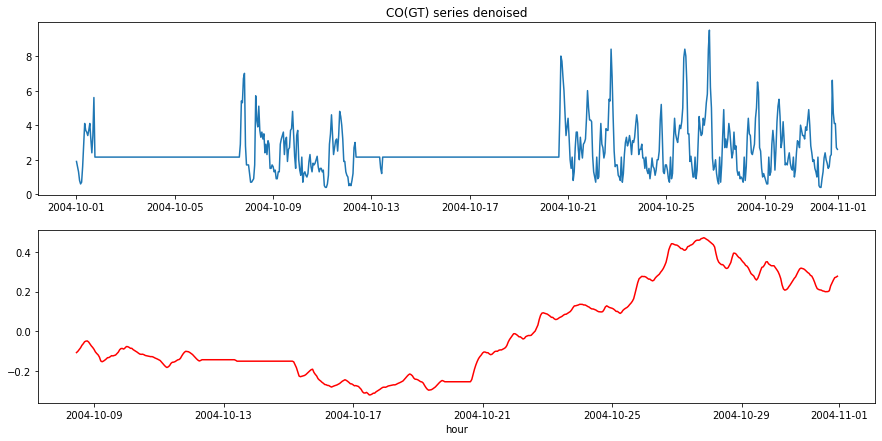

In [475]:
w = 180
plt.figure(figsize=(15,7))
plt.subplot(212)
dfForecasting_denoised = ((dfForecasting['CO(GT)']-dfForecasting['CO(GT)'].mean())/dfForecasting['CO(GT)'].std()).rolling(window=w).mean()
plt.plot(dfForecasting_denoised, c = 'red')
plt.xlabel('hour')

plt.subplot(211)
plt.plot(dfForecasting['CO(GT)'])

plt.title('CO(GT) series denoised')
plt.show()

Analyse the Trend on denoised serie:

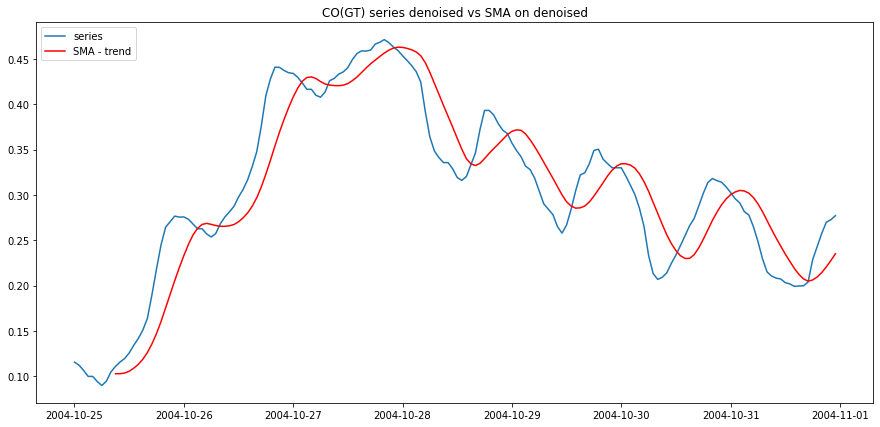

In [476]:
ts = dfForecasting_denoised.loc['2004-10-25':'2004-10-31']
sma = ts.rolling(window = 10).mean()       #simple moving average
plt.figure(figsize=(15,7))
plt.plot(ts)
plt.plot(sma, c = 'red')
plt.legend(['series','SMA - trend'], loc = 'upper left')  
plt.title('CO(GT) series denoised vs SMA on denoised') 
plt.show()

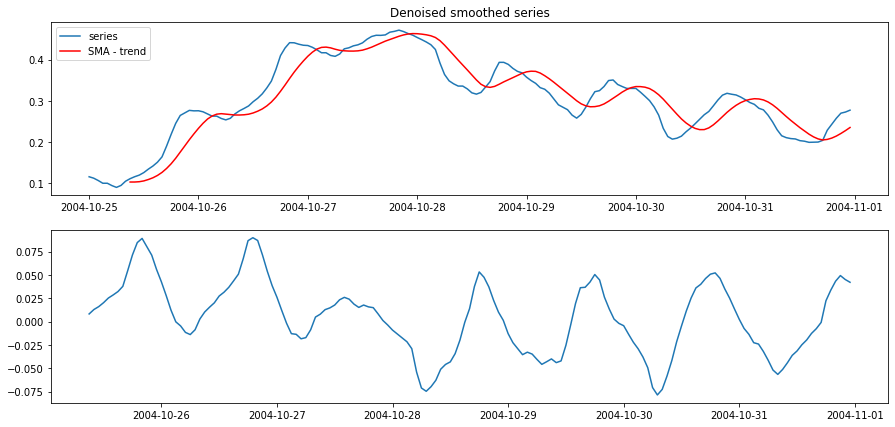

In [477]:
plt.figure(figsize=(15,7))
plt.subplot(211)
ts = dfForecasting_denoised.loc['2004-10-25':'2004-10-31']
sma = ts.rolling(window = 10).mean()       #simple moving average
plt.plot(ts)
plt.plot(sma, c = 'red')
plt.title('Denoised smoothed series')

plt.legend(['series','SMA - trend'], loc = 'upper left')   

plt.subplot(212)
ts_shift = ts - sma
plt.plot(ts_shift)
plt.show()

At this point, we introduce the Dickey-Fuller test.
This test evaluates or determines how strongly a time series is defined by a trend.

NOTA: Dickey-Fuller=DF (tutto maiuscolo senno mi sbaglio con dataframe)

In [478]:
from statsmodels.tsa.stattools import adfuller


In [479]:
DFtest = adfuller(dfForecasting_denoised.values[179:], autolag='AIC') # perchè 179? mi sfugge, vedi libreria -> non capisco, sotto soglia 179 non funziona

print('Results of Dickey-Fuller Test:')

DFoutput = pd.Series(DFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in DFtest[4].items():
    DFoutput['Critical Value (%s)'%key] = value
print(DFoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.566137
p-value                          0.878452
#Lags Used                      19.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


Running the code with this transformation prints the test statistic value of -0.566. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -0.566 is lower than the value of -3.4420 at 1%.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

This are the value for DF test , the most significat are the values of Test Statistic and the Critical Value of 1%.

Now we can compare this DF result on CO(GT) time series without noise with the original CO(GT) time series with noise.
If the value of Test Statistic on oginal time seriesand the Cirtical value (1%) = -3.44 of the denoised time series ar minor of the same value in the orginal time series -> we can we can say that the original series is stationary, otherwise not.

Proviamo:


SPOILER -> NON FARE PERCHè NON DA RISULTATI SIGNIFICATIVI, CONCENTRIAMOCI SU SERIE CON RIDUZIONE RUMORE + LOG TRANSF + DIFF TRANSFORAMTION

### Autocorrelation and Partial Correaltion on Origianal time series without Noise

In [480]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


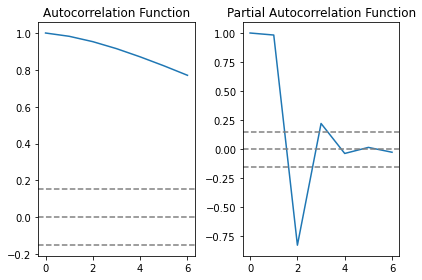

In [481]:
# ACF (autocorrelation function) and PACF (partial autocorrelation function) plots:
lag_acf = acf(ts, nlags=6)
lag_pacf = pacf(ts, nlags=6, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

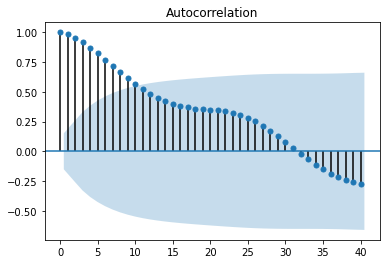

In [482]:
plot_acf(ts, lags=40)
plt.show()

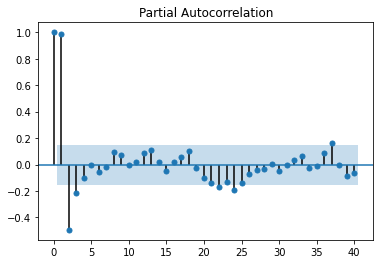

In [483]:
plot_pacf(ts, lags=40)
plt.show()

## "Forecasting" su Time series CO(GT) originaria

per prendere i dati della serie originaria li prendo da un validation set creato ad hoc, è un pò sneaky ma torna, anche gli altri avevano il dataset splittato in 3 con training , validation e test, allora mi sono creato una divisione artificiosa del nostro dataset in 3 dataset:

In [484]:
df2 = pd.read_csv('TrainingTS.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [485]:
df2['DateTime']=pd.to_datetime(df2.DateTime)

In [486]:
df2 = df2.set_index(['DateTime'])

In [487]:
df2original = df2[['CO(GT)','Weekend']]
df2original.head()

,CO(GT),Weekend
DateTime,,
2004-10-30 14:00:00,3.40000,1
2004-10-03 13:00:00,2.15275,1
2004-10-06 09:00:00,2.15275,0
2004-10-28 08:00:00,4.40000,0
2004-10-11 18:00:00,4.50000,0


In [488]:
df2original.shape

(446, 2)

In [489]:
ts = dfForecasting_denoised[179:] # mi serve da confronto come dicevo prima
ts

DateTime
2004-10-08 11:00:00   -0.107786
2004-10-08 12:00:00   -0.101415
2004-10-08 13:00:00   -0.092313
2004-10-08 14:00:00   -0.083666
2004-10-08 15:00:00   -0.071378
                         ...   
2004-10-31 19:00:00    0.242998
2004-10-31 20:00:00    0.257561
2004-10-31 21:00:00    0.269849
2004-10-31 22:00:00    0.272579
2004-10-31 23:00:00    0.277130
Name: CO(GT), Length: 565, dtype: float64

In [490]:
ts_test = ((df2original['CO(GT)']-df2original['CO(GT)'].mean())/df2original['CO(GT)'].std()).rolling(window=w).mean()
ts_test


DateTime
2004-10-30 14:00:00         NaN
2004-10-03 13:00:00         NaN
2004-10-06 09:00:00         NaN
2004-10-28 08:00:00         NaN
2004-10-11 18:00:00         NaN
                         ...   
2004-10-13 21:00:00   -0.097956
2004-10-29 13:00:00   -0.084030
2004-10-28 05:00:00   -0.096787
2004-10-18 09:00:00   -0.096787
2004-10-09 05:00:00   -0.106710
Name: CO(GT), Length: 446, dtype: float64

In [491]:
ts_test.shape

(446,)

In [492]:
ts_test = ts_test[np.logical_not(np.isnan(ts_test))]

In [493]:
ts_test.shape

(267,)

In [494]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='min')


In [495]:
# define a check stationarity function
def check_stationarity(timeseries,w):

    # Determine rolling statistics (moving averages and variance)
    rolmean = timeseries.rolling(window=w).mean()
    rolstd = timeseries.rolling(window=w).std()

    # Plot rolling statistics:
    plt.figure(figsize=(15,7))
    orig = plt.plot(timeseries, color='orange',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

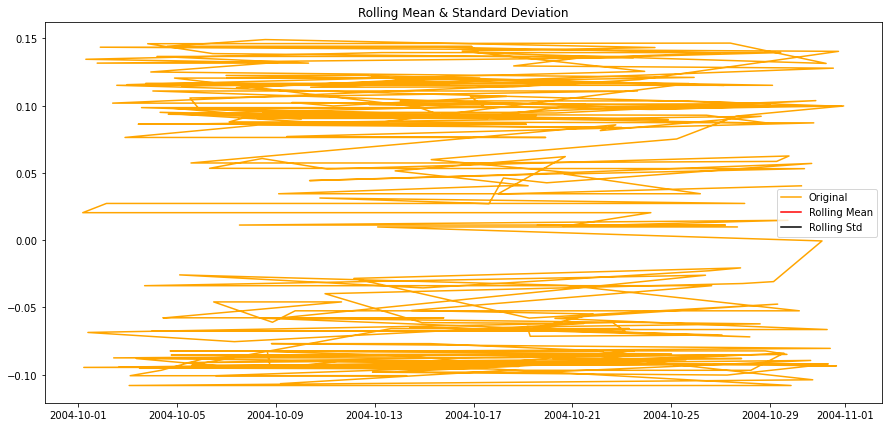

Results of Dickey-Fuller Test:
Test Statistic                  -0.090515
p-value                          0.950375
#Lags Used                       2.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [496]:
check_stationarity(ts_test,1440) #1440 minuti di una giornata


From this value the original serie it does not show evidence for which we can say that it is a stationary series 
**NON MI PIACE PER NULLA QUESTA ANALISI PERò, CI SONO PUNTI CHE NON CAPISCO, PER NON PARLARE DEL GRAFICO**


IMPO : Ok ora mi torna, il problema è che nella serie originale non c'era molto rumore, quindi la serie senza rumore non è che dia risultati molto diversi .
Allora si può dire che i risultati di DF sono molto simili per entrambe non riuscendo a stabilire in questo modo se la serie originale è stazionaria o meno.


## **Transformation + Autocorrelation + Partial correlation**

### Log Transformation

NB: come parametro di riferimento uso serie con riduzione rumore che da DF test ha i seguenti risultati:
- Test Statistic                  -0.566137
- p-value                          0.878452
- Lags Used                      19.000000
- Number of Observations Used    545.000000
- Critical Value (1%)             -3.442406
- Critical Value (5%)             -2.866858
- Critical Value (10%)            -2.569602

In [497]:
ts = dfForecasting_denoised[179:]

In [498]:
ts.shape

(565,)

In [499]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1],freq="H")


In [500]:
index.shape

(565,)

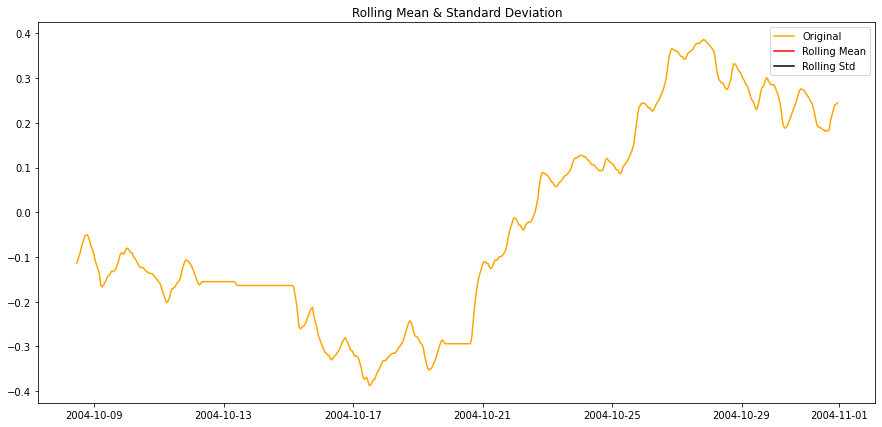

Results of Dickey-Fuller Test:
Test Statistic                  -0.629953
p-value                          0.864069
#Lags Used                       2.000000
Number of Observations Used    562.000000
Critical Value (1%)             -3.442039
Critical Value (5%)             -2.866697
Critical Value (10%)            -2.569516
dtype: float64


In [501]:
ts_log = pd.Series(np.log(ts.values+1), index)
check_stationarity(ts_log,1440)

DF test on series with logaritck trasformation produces a lower value (-0.6299) in term of Test Statistic.
If we observe insted the critical values are pretty the same.
With this observation we could say that we prefer the original time series with noise reduction.

Running the code with this transformation prints the test statistic value of -0.06299 The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -0.06299 is more than the value of -3.4420 at 1%.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

**Autocorrelation and Partial Autocorrelation on Logaritmic transormation:**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


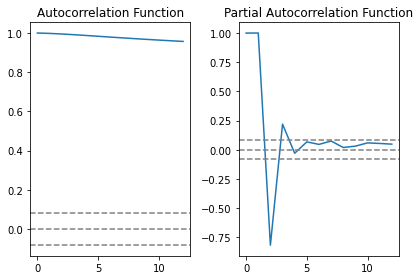

In [502]:
# ACF (autocorrelation function) and PACF (partial autocorrelation function) plots:
lag_acf = acf(ts_log, nlags=12)
lag_pacf = pacf(ts_log, nlags=12, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

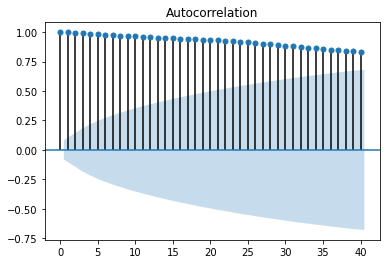

In [503]:
plot_acf(ts_log, lags=40)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


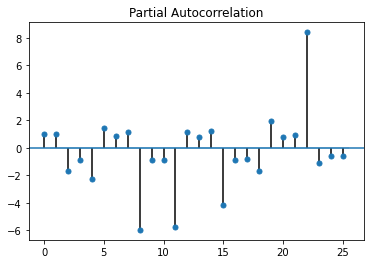

In [504]:
plot_pacf(ts_log, lags=25)
plt.show()

### Differentiaed transformation

NB: come parametro di riferimento uso serie con riduzione rumore che da DF test ha i seguenti risultati:
- Test Statistic                  -0.566137
- p-value                          0.878452
- Lags Used                      19.000000
- Number of Observations Used    545.000000
- Critical Value (1%)             -3.442406
- Critical Value (5%)             -2.866858
- Critical Value (10%)            -2.569602

In [505]:
ts = dfForecasting_denoised[179:]

In [506]:
ts.shape

(565,)

In [507]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1],freq="H")


In [508]:
index.shape

(565,)

<Figure size 1080x504 with 0 Axes>

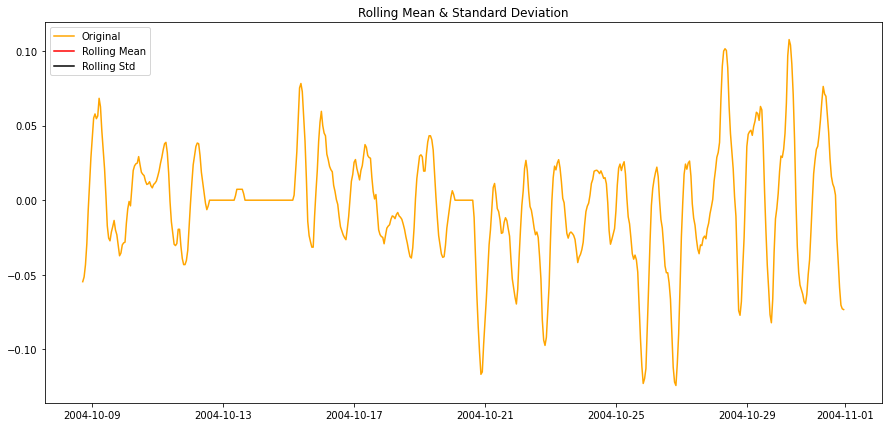

Results of Dickey-Fuller Test:
Test Statistic                  -3.537778
p-value                          0.007068
#Lags Used                      19.000000
Number of Observations Used    539.000000
Critical Value (1%)             -3.442541
Critical Value (5%)             -2.866917
Critical Value (10%)            -2.569634
dtype: float64


In [509]:
plt.figure(figsize=(15,7))
ts_diff = pd.Series(ts[:-6].values - ts[6:].values, index=ts.index[6:])
check_stationarity(ts_diff,1440)

Running the code with this transformation prints the test statistic value of -3.5378. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -3.5378 is less than the value of -3.4425 at 1%.

In this case we can say that with this transformation we obtained a stationary series becuse this suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

**Autocorrelation and Partial Autocorrelation on differentiad transormation:**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


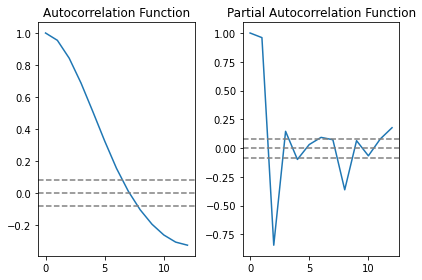

In [510]:
lag_acf = acf(ts_diff, nlags=12)
lag_pacf = pacf(ts_diff, nlags=12, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

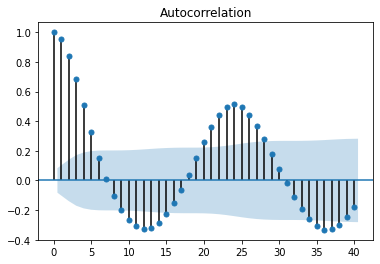

In [511]:
plot_acf(ts_diff, lags=40)
plt.show()

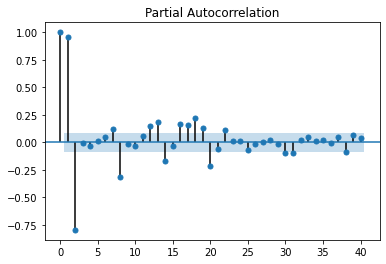

In [512]:
plot_pacf(ts_diff, lags=40)
plt.show()

**conclusione su trasformazioni a seguito del DF test prima del forecasting**:
- Stationary -> Differentiaed transormation
- no-stationary -> original without noise and Log transformation

Valutare se si vuole fare una tabella con tutti i valori del DF test per ogni trasformazione e evidenziare le consedunge sulla stazionarity dette sopra e per autocorrealtion e partial correaltion invece di emttere tutti e 6 i grafici potemmo dire che quello della trasgoramionze logaritmica ha andamento decrescente lineare mentre gli altri due andamento sinuosoide / sinusoidale

oppure far vedere grafici autocorrealtion e partial correaltion solo della TS scelta per forecasting, che sarà quella con trasformaizone dirrentiaed

## **Forecasting**

Vedendo su altri report loro per il forecasting hanno scelto la serie stazionaria, quindi io ho pensato di fare il forecasting sulla nostra serie staizonaria, ovvero quella con trasfomarzione differentiad

For forecasting task we will use 3 models:
- Holt Winter’s Exponential Smoothing
- Simple Smoothing
- Exponential Smoothing
- ARIMA
- SARIMAX

these models will be applied not in the original time series but in the transformed series with the differentiad transformation, because it is the only one that is stationary according to the DF test results.

in order to evaluate the performances of the models we will use  the following evaluation metrics:
- AIC
- MAE
- MAPE
- R^2




In [513]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [514]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

Faccio tutto a diritto facendo tutte e 3 le time series e semmai si prendono solo risultati di quella differenziale

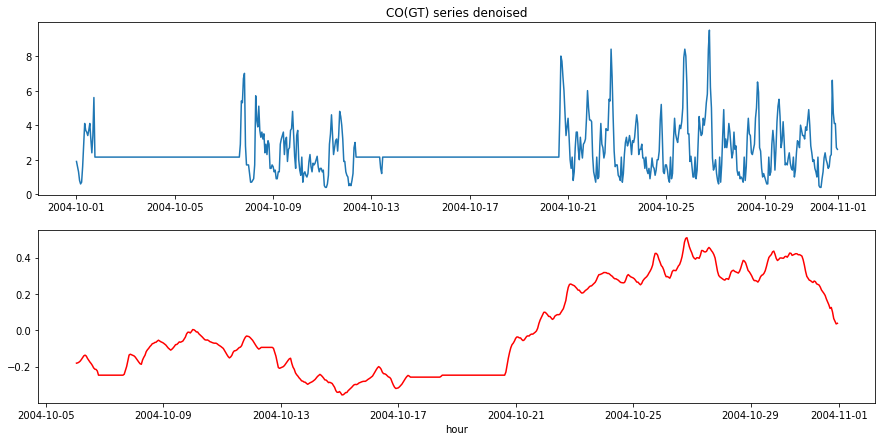

In [563]:
w = 122
plt.figure(figsize=(15,7))
plt.subplot(212)
dfForecasting_denoised = ((dfForecasting['CO(GT)']-dfForecasting['CO(GT)'].mean())/dfForecasting['CO(GT)'].std()).rolling(window=w).mean()
plt.plot(dfForecasting_denoised, c = 'red')
plt.xlabel('hour')

plt.subplot(211)
plt.plot(dfForecasting['CO(GT)'])

plt.title('CO(GT) series denoised')
plt.show()

In [564]:
ts

DateTime
2004-10-08 11:00:00   -0.107786
2004-10-08 12:00:00   -0.101415
2004-10-08 13:00:00   -0.092313
2004-10-08 14:00:00   -0.083666
2004-10-08 15:00:00   -0.071378
                         ...   
2004-10-31 19:00:00    0.242998
2004-10-31 20:00:00    0.257561
2004-10-31 21:00:00    0.269849
2004-10-31 22:00:00    0.272579
2004-10-31 23:00:00    0.277130
Name: CO(GT), Length: 565, dtype: float64

In [565]:
start_index = datetime(2004, 10, 25)
end_index = datetime(2004, 10, 31)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [571]:
index_test = pd.date_range(start=start_index, end=end_index, freq='H')
ts_test = pd.Series(ts_test.values[:],index_test)
ts_test

2004-10-25 00:00:00    0.122424
2004-10-25 01:00:00    0.115087
2004-10-25 02:00:00    0.115087
2004-10-25 03:00:00    0.101385
2004-10-25 04:00:00    0.100689
                         ...   
2004-10-30 20:00:00   -0.097956
2004-10-30 21:00:00   -0.084030
2004-10-30 22:00:00   -0.096787
2004-10-30 23:00:00   -0.096787
2004-10-31 00:00:00   -0.106710
Freq: H, Length: 145, dtype: float64

In [572]:
total_ts = ts.append(ts_test)
total_ts.isnull().sum()

0

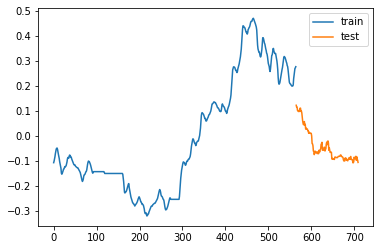

In [573]:
plt.plot(range(len(index)), ts, label='train')
plt.plot(range(len(index),len(index)+len(index_test)), ts_test, label='test')
plt.legend()
plt.show()

In [574]:
ts_diff_test = pd.Series(ts_test[:-6].values - ts_test[6:].values, index=ts_test.index[6:])
ts_diff_test

total_ts_diff = ts_diff.append(ts_diff_test)
total_ts_diff.isnull().sum()

0

In [582]:
ts_log_test = pd.Series(np.log(ts_test.values+1), index_test)

In [583]:
total_ts_log = ts_log.append(ts_log_test)
total_ts_log.isnull().sum()

0

### Smoothing a 0.005

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


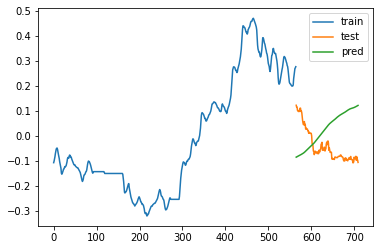

AIC -1859.578
MAE 0.130
RMSE 0.144
MAD 0.151
R2 -3.201
MAPE 3.800
MAXAPE 150.207
TAPE 551.016


In [584]:
# smoothing su time series originale
smoothing_level = 0.005

ses = SimpleExpSmoothing(ts).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_test.index[0], end=ts_test.index[-1])

plt.plot(range(len(ts)), ts, label='train')
plt.plot(range(len(ts), len(ts)+len(ts_test)), ts_test, label='test')
plt.plot(range(len(ts), len(ts)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_test, pred, total_ts).items():
    print('%s %.3f' % (k, v))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


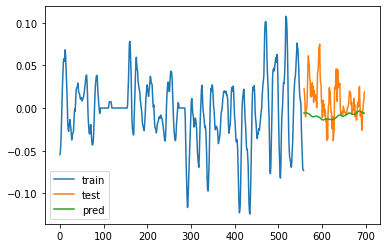

AIC -3651.464
MAE 0.021
RMSE 0.028
MAD 0.016
R2 -0.390
MAPE 2.435
MAXAPE 10.427
TAPE 338.496


In [585]:
# SMOOTHING SU TS_DIFF
smoothing_level = 0.005

ses = SimpleExpSmoothing(ts_diff).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_diff_test.index[0], end=ts_diff_test.index[-1])

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_diff_test, pred, total_ts_diff).items():
    print('%s %.3f' % (k, v))

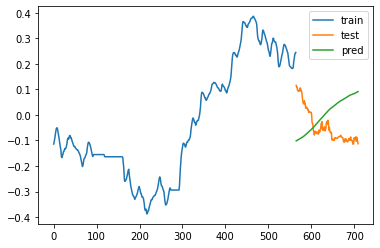

AIC -1866.985
MAE 0.117
RMSE 0.131
MAD 0.131
R2 -3.012
MAPE 3.554
MAXAPE 92.346
TAPE 515.280


In [586]:
smoothing_level = 0.005

ses = SimpleExpSmoothing(ts_log).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_log_test.index[0], end=ts_log_test.index[-1])

plt.plot(range(len(ts_log)), ts_log, label='train')
plt.plot(range(len(ts_log), len(ts_log)+len(ts_log_test)), ts_log_test, label='test')
plt.plot(range(len(ts_log), len(ts_log)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_log_test, pred, total_ts_log).items():
    print('%s %.3f' % (k, v))

### Smoothing a 0.0005

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


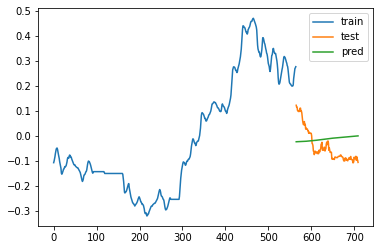

AIC -1657.951
MAE 0.069
RMSE 0.076
MAD 0.076
R2 -0.173
MAPE 16.306
MAXAPE 276.185
TAPE 2364.298


In [587]:
# smoothing su time series originale
smoothing_level = 0.0005

ses = SimpleExpSmoothing(ts).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_test.index[0], end=ts_test.index[-1])

plt.plot(range(len(ts)), ts, label='train')
plt.plot(range(len(ts), len(ts)+len(ts_test)), ts_test, label='test')
plt.plot(range(len(ts), len(ts)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_test, pred, total_ts).items():
    print('%s %.3f' % (k, v))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


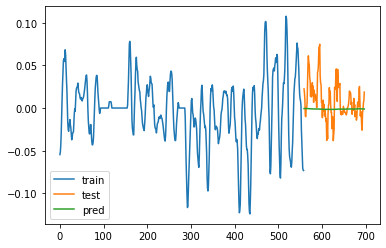

AIC -3641.092
MAE 0.017
RMSE 0.024
MAD 0.010
R2 0.007
MAPE 15.667
MAXAPE 91.682
TAPE 2177.733


In [588]:
# SMOOTHING SU TS_DIFF
smoothing_level = 0.0005

ses = SimpleExpSmoothing(ts_diff).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_diff_test.index[0], end=ts_diff_test.index[-1])

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_diff_test, pred, total_ts_diff).items():
    print('%s %.3f' % (k, v))

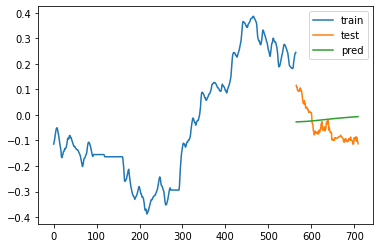

AIC -1675.999
MAE 0.068
RMSE 0.075
MAD 0.074
R2 -0.319
MAPE 5.006
MAXAPE 15.914
TAPE 725.914


In [589]:
smoothing_level = 0.0005

ses = SimpleExpSmoothing(ts_log).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=ts_log_test.index[0], end=ts_log_test.index[-1])

plt.plot(range(len(ts_log)), ts_log, label='train')
plt.plot(range(len(ts_log), len(ts_log)+len(ts_log_test)), ts_log_test, label='test')
plt.plot(range(len(ts_log), len(ts_log)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(ses.aic,3))

for k, v in evaluate(ts_log_test, pred, total_ts_log).items():
    print('%s %.3f' % (k, v))

### Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


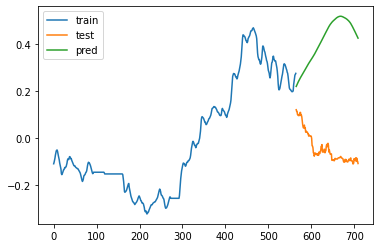

AIC -2313.427
MAE 0.458
RMSE 0.482
MAD 0.501
R2 -45.929
MAPE 1.063
MAXAPE 1.250
TAPE 154.107


In [606]:
# TS originale
smoothing_level=0.005

holt = Holt(ts).fit(smoothing_level=smoothing_level)
pred = holt.predict(start=ts_test.index[0], end=ts_test.index[-1])

plt.plot(range(len(ts)), ts, label='train')
plt.plot(range(len(ts), len(ts)+len(ts_test)), ts_test, label='test')
plt.plot(range(len(ts), len(ts)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(holt.aic,3))

for k, v in evaluate(ts_test, pred, total_ts).items():
    print('%s %.3f' % (k, v))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


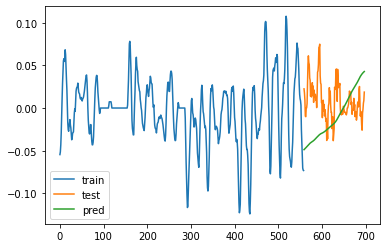

AIC -3568.744
MAE 0.035
RMSE 0.044
MAD 0.034
R2 -2.432
MAPE 1.575
MAXAPE 11.777
TAPE 218.880


In [607]:
# TS diff
smoothing_level=0.0005

holt = Holt(ts_diff).fit(smoothing_level=smoothing_level)
pred = holt.predict(start=ts_diff_test.index[0], end=ts_diff_test.index[-1])

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(holt.aic,3))

for k, v in evaluate(ts_diff_test, pred, total_ts_diff).items():
    print('%s %.3f' % (k, v))

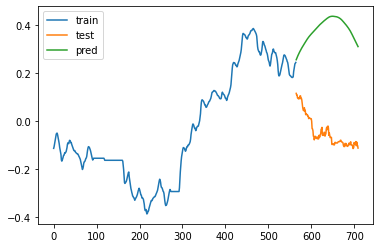

AIC -2283.19
MAE 0.423
RMSE 0.436
MAD 0.461
R2 -43.288
MAPE 1.099
MAXAPE 1.363
TAPE 159.409


In [608]:
# TS log
smoothing_level=0.005

holt = Holt(ts_log).fit(smoothing_level=smoothing_level)
pred = holt.predict(start=ts_log_test.index[0], end=ts_log_test.index[-1])

plt.plot(range(len(ts_log)), ts_log, label='train')
plt.plot(range(len(ts_log), len(ts_log)+len(ts_log_test)), ts_log_test, label='test')
plt.plot(range(len(ts_log), len(ts_log)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(holt.aic,3))

for k, v in evaluate(ts_log_test, pred, total_ts_log).items():
    print('%s %.3f' % (k, v))

### EsxpSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


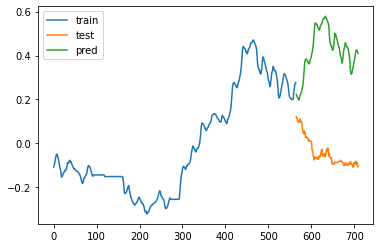

AIC -1383.193
MAE 0.462
RMSE 0.486
MAD 0.514
R2 -46.566
MAPE 1.066
MAXAPE 1.317
TAPE 154.632


In [594]:
# TS originale
seasonal_periods=565

es = ExponentialSmoothing(ts, seasonal_periods=seasonal_periods, seasonal='add').fit(smoothing_seasonal=1.0)
pred = es.predict(start=ts_test.index[0], end=ts_test.index[-1])

plt.plot(range(len(ts)), ts, label='train')
plt.plot(range(len(ts), len(ts)+len(ts_test)), ts_test, label='test')
plt.plot(range(len(ts), len(ts)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(es.aic,3))

for k, v in evaluate(ts_test, pred, total_ts).items():
    print('%s %.3f' % (k, v))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


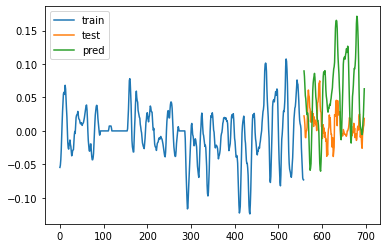

AIC -1955.18
MAE 0.066
RMSE 0.078
MAD 0.062
R2 -9.880
MAPE 1.556
MAXAPE 30.283
TAPE 216.243


In [599]:
# TS_DIFF
seasonal_periods=558

es = ExponentialSmoothing(ts_diff, seasonal_periods=seasonal_periods, seasonal='add').fit(smoothing_seasonal=1.0)
pred = es.predict(start=ts_diff_test.index[0], end=ts_diff_test.index[-1])

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(es.aic,3))

for k, v in evaluate(ts_diff_test, pred, total_ts_diff).items():
    print('%s %.3f' % (k, v))

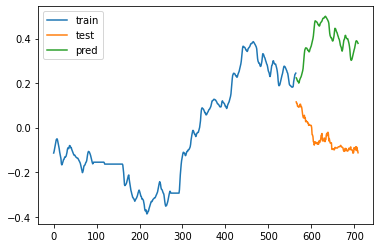

AIC -1319.367
MAE 0.428
RMSE 0.447
MAD 0.482
R2 -45.476
MAPE 1.087
MAXAPE 1.353
TAPE 157.611


In [600]:
# TS LOG
seasonal_periods=565

es = ExponentialSmoothing(ts_log, seasonal_periods=seasonal_periods, seasonal='add').fit(smoothing_seasonal=1.0)
pred = es.predict(start=ts_log_test.index[0], end=ts_log_test.index[-1])

plt.plot(range(len(ts_log)), ts_log, label='train')
plt.plot(range(len(ts_log), len(ts_log)+len(ts_log_test)), ts_log_test, label='test')
plt.plot(range(len(ts_log), len(ts_log)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(es.aic,3))

for k, v in evaluate(ts_log_test, pred, total_ts_log).items():
    print('%s %.3f' % (k, v))

### ARIMA approach

PRESO DA NOTEBOOK KAGGLE:

Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.
- AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use x(t-1), x(t-2) and x(t-3) to predict x(t)
- I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0
- MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.

**(p,d,q) is parameters of ARIMA model.**


In order to choose p,d,q parameters we will use two different plots.
Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.


Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons

In [515]:
ts_diff

DateTime
2004-10-08 17:00:00   -0.054612
2004-10-08 18:00:00   -0.051426
2004-10-08 19:00:00   -0.043234
2004-10-08 20:00:00   -0.029126
2004-10-08 21:00:00   -0.006826
                         ...   
2004-10-31 19:00:00   -0.041174
2004-10-31 20:00:00   -0.058468
2004-10-31 21:00:00   -0.070300
2004-10-31 22:00:00   -0.072816
2004-10-31 23:00:00   -0.073271
Length: 559, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


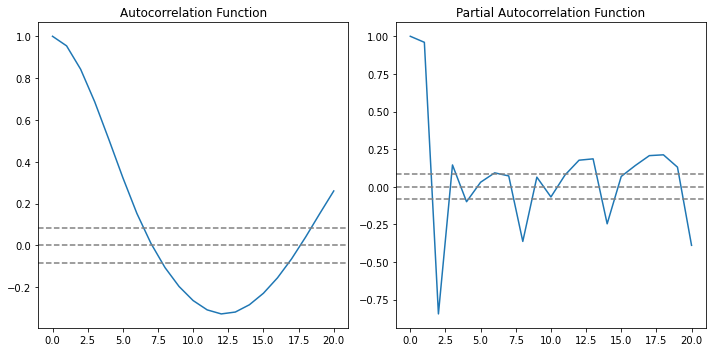

In [516]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(10,5))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values.

- Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=2.
- Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=7.


Now lets use (2,0,7) as parameters of ARIMA models and predict
ARIMA: from statsmodels libarary
datetime: we will use it start and end indexes of predict method

In [519]:
start_index = datetime(2004, 10, 25)
end_index = datetime(2004, 10, 31)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


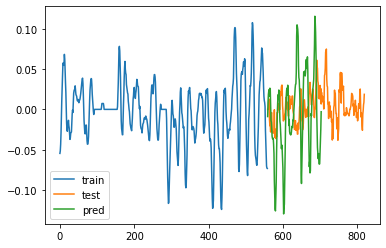

AIC -4434.743


In [520]:
arima = ARIMA(ts_diff, order=(2,0,7)).fit()
pred = arima.predict(start=start_index, end=end_index)

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(arima.aic,3))



non ho valutazione, solo valore AIC, ma è peggio, non si scrive nel report, magari si mette solo grafico sopra

### SARIMAX approach

in this case for set the other model parameters, q, P, D, Q, various tests have been carried out, because it was treaky to estimate them on the basis of the ACF graphs and PACF.
Despite various attempts, we have unfortunately not found significant improvements in the performances


In [ ]:
start_index = datetime(2004, 10, 25)
end_index = datetime(2004, 10, 31)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


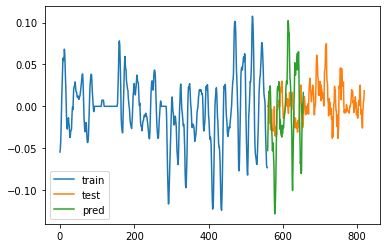

AIC -4180.334


In [461]:
sarimax = SARIMAX(ts_diff, order=(2,0,7), seasonal_order=(5, 1, 3, 10)).fit(disp=False)
pred = sarimax.predict(start=start_index, end=end_index)

plt.plot(range(len(ts_diff)), ts_diff, label='train')
plt.plot(range(len(ts_diff), len(ts_diff)+len(ts_diff_test)), ts_diff_test, label='test')
plt.plot(range(len(ts_diff), len(ts_diff)+len(pred)), pred, label='pred')
plt.legend()
plt.show()
print("AIC",round(sarimax.aic,3))



non ho valutazione, solo valore AIC, ma è peggio, non si scrive nel report, magari si mette solo grafico sopra

In [604]:
start_index = datetime(2004, 10, 25)
end_index = datetime(2004, 10, 31)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
